# Ride Share App Data, EDA

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('mass_uber_df.xlsx')

In [ ]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,number_of_passengers,year,month,day_of_week,hour,distance_miles,quarter_of_year_Q1,quarter_of_year_Q2,quarter_of_year_Q3,quarter_of_year_Q4
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,1.052077,0,1,0,0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,1.535994,0,0,1,0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,3.147736,0,0,1,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,1.038552,0,1,0,0
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,2.797156,0,0,1,0


In [ ]:
print("Basic Statistics:")
df.describe()

Basic Statistics:


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,number_of_passengers,year,month,day_of_week,hour,distance_miles,quarter_of_year_Q1,quarter_of_year_Q2,quarter_of_year_Q3,quarter_of_year_Q4
count,20067.000000,20067.000000,20067.000000,20067.000000,20067.000000,20067.000000,20067.000000,20067.000000,20067.000000,20067.000000,20067.000000,20067.000000,20067.000000,20067.000000,20067.000000
mean,9.600734,-73.979898,40.752023,-73.978272,40.751921,1.683510,2011.761549,6.244282,3.061992,13.546071,1.692754,0.270942,0.274431,0.222554,0.232073
std,4.812853,0.024335,0.023807,0.025463,0.026535,1.301177,1.864037,3.443631,1.939647,6.512484,1.115038,0.444457,0.446238,0.415972,0.422166
min,3.700000,-75.342904,40.428030,-75.350437,40.422658,0.000000,2009.000000,1.000000,0.000000,0.000000,0.396090,0.000000,0.000000,0.000000,0.000000
25%,6.100000,-73.992681,40.737091,-73.992073,40.736573,1.000000,2010.000000,3.000000,1.000000,9.000000,0.847354,0.000000,0.000000,0.000000,0.000000
50%,8.500000,-73.982545,40.752925,-73.981324,40.753577,1.000000,2012.000000,6.000000,3.000000,14.000000,1.344170,0.000000,0.000000,0.000000,0.000000
75%,11.700000,-73.970444,40.766959,-73.967903,40.767888,2.000000,2013.000000,9.000000,5.000000,19.000000,2.216837,1.000000,1.000000,0.000000,0.000000
max,43.330000,-73.712800,41.028748,-73.699587,41.023815,6.000000,2015.000000,12.000000,6.000000,23.000000,5.435579,1.000000,1.000000,1.000000,1.000000


In [ ]:
correlation_matrix = df.corr()

# Filtering the correlation matrix
filtered_correlation = correlation_matrix[(correlation_matrix >= 0.4) | (correlation_matrix <= -0.4)]

# Optionally, to clean up the matrix and not display NaN values for correlations that do not meet the criteria
filtered_correlation = filtered_correlation.applymap(lambda x: x if x >= 0.4 or x <= -0.4 else None)

filtered_correlation


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,number_of_passengers,year,month,day_of_week,hour,distance_miles,quarter_of_year_Q1,quarter_of_year_Q2,quarter_of_year_Q3,quarter_of_year_Q4
fare_amount,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.821768,NaN,NaN,NaN,NaN
pickup_longitude,NaN,1.000000,NaN,0.606213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickup_latitude,NaN,NaN,1.000000,NaN,0.556002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dropoff_longitude,NaN,0.606213,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dropoff_latitude,NaN,NaN,0.556002,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_passengers,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,-0.749583,NaN,NaN,0.75496
day_of_week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


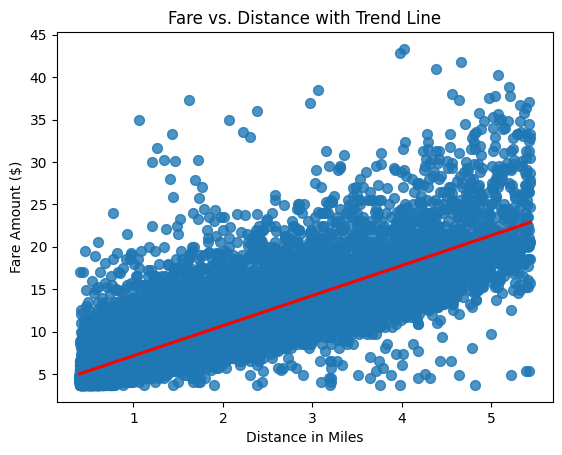

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a scatter plot with a regression line using seaborn
sns.regplot(x='distance_miles', y='fare_amount', data=df, scatter_kws={'s': 50}, line_kws={"color": "red"})

# Setting plot labels and title
plt.xlabel('Distance in Miles')
plt.ylabel('Fare Amount ($)')
plt.title('Fare vs. Distance with Trend Line')

# Show the plot
plt.show()


<ipython-input-12-596885d5d291>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_week', data=df, palette='viridis')


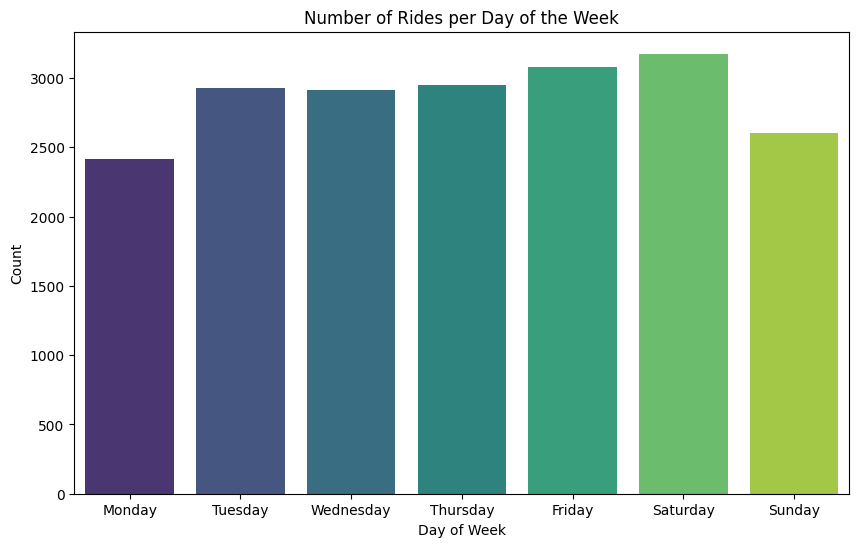

In [ ]:
# Bar chart for Day of the Week
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df, palette='viridis')
plt.title('Number of Rides per Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

<ipython-input-14-351c5d6031fc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='fare_amount', data=average_fare_by_year, palette='coolwarm')


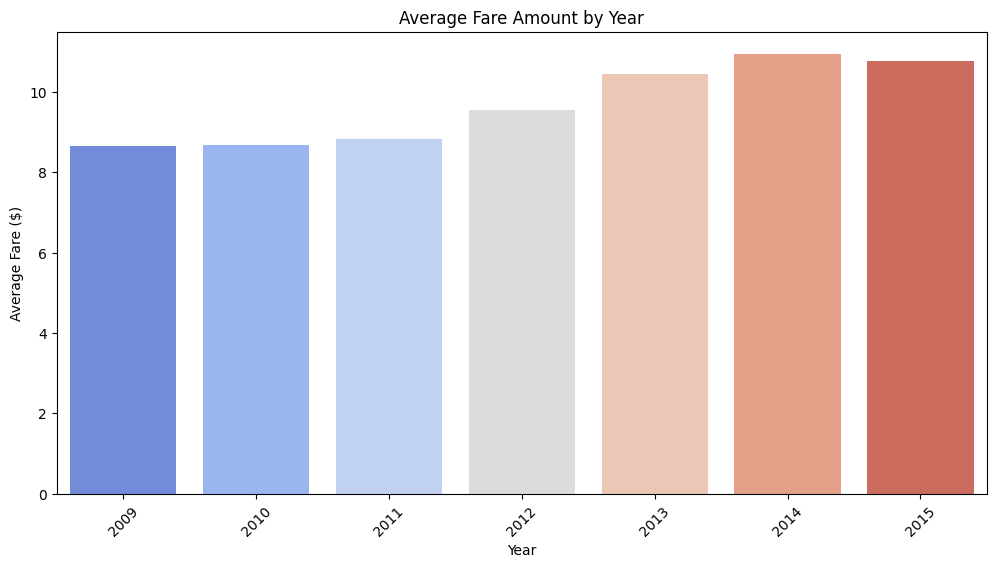

In [ ]:
# Calculate average fare by year
average_fare_by_year = df.groupby('year')['fare_amount'].mean().reset_index()

# Bar chart for average fare by year
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='fare_amount', data=average_fare_by_year, palette='coolwarm')
plt.title('Average Fare Amount by Year')
plt.xlabel('Year')
plt.ylabel('Average Fare ($)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


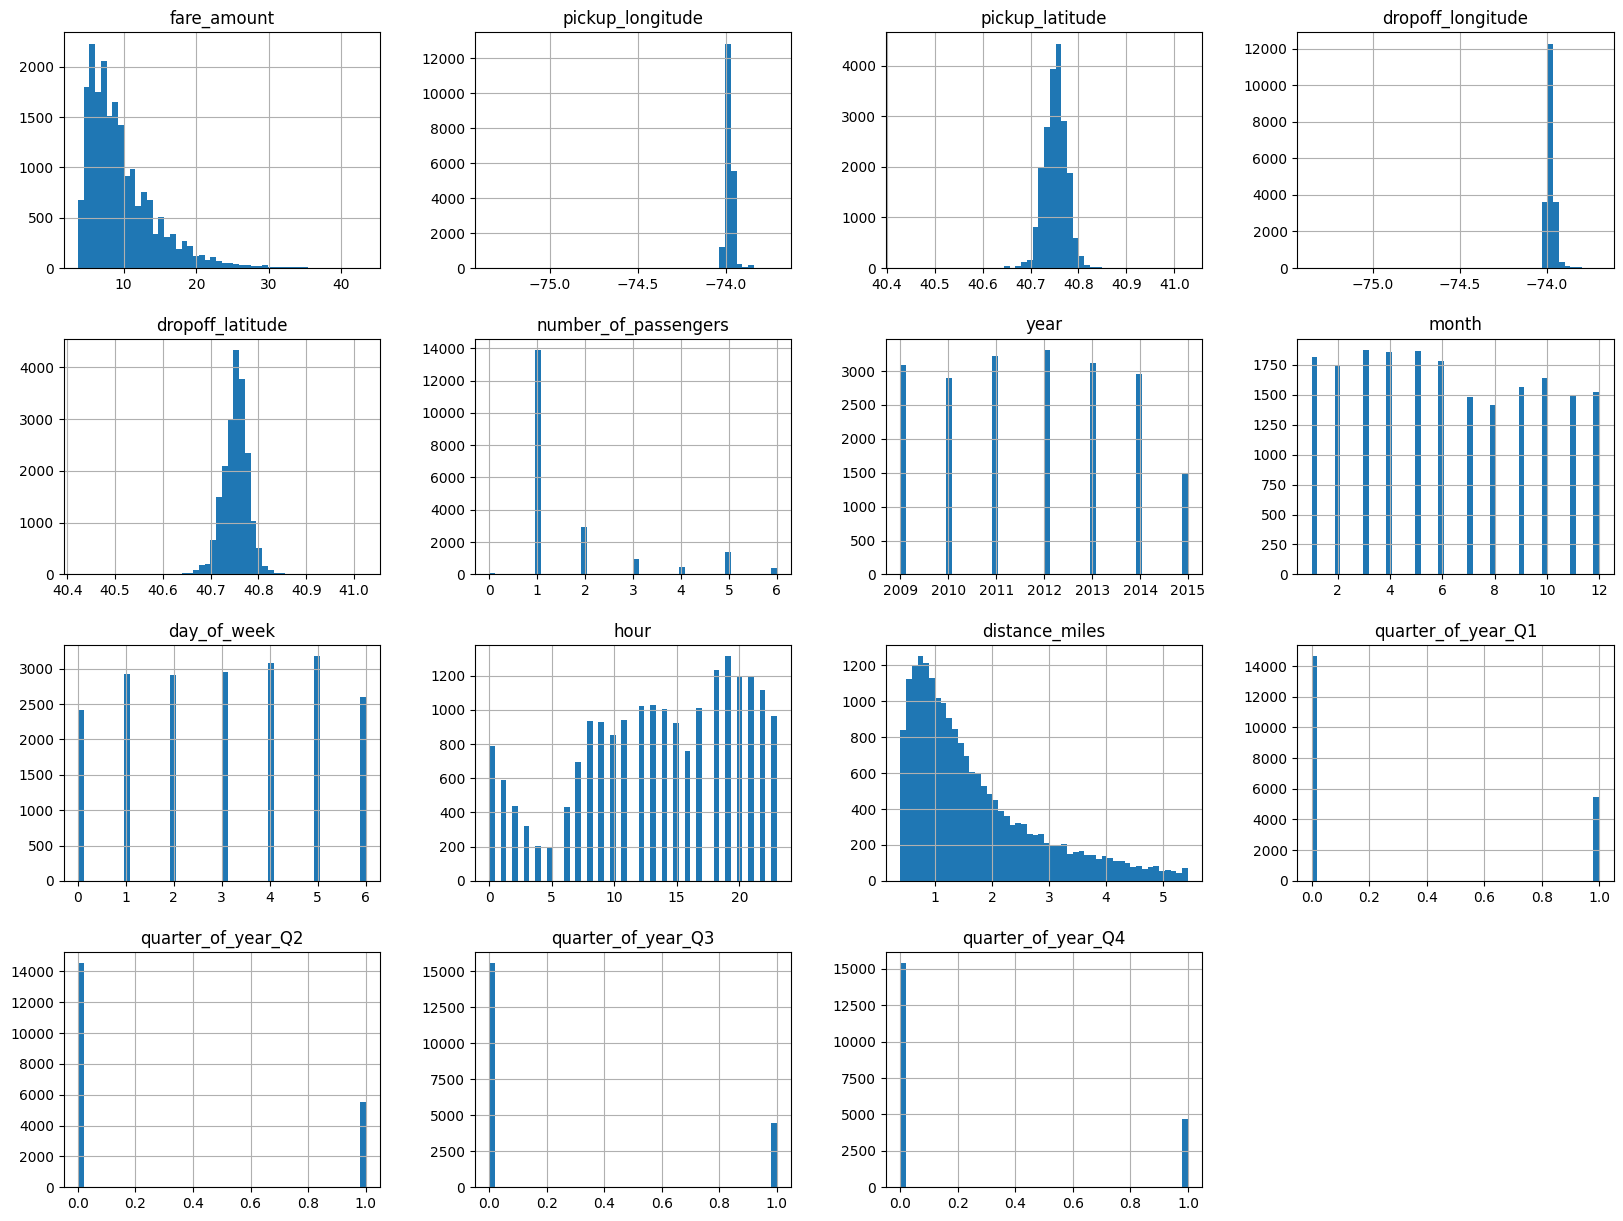

In [ ]:
# Plot histogram for all numerical columns
df.hist(bins=50, figsize=(20,15))
plt.show()

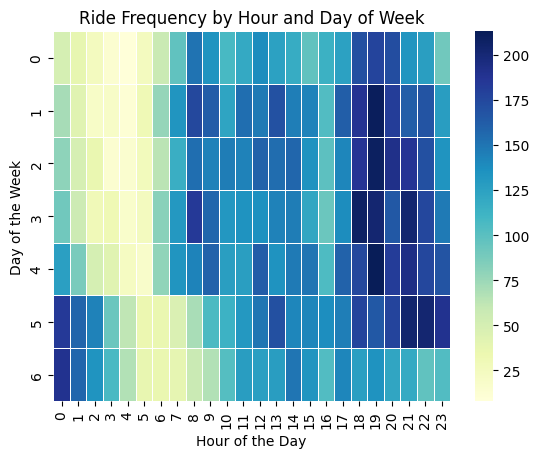

In [ ]:
# Heatmap of Ride Frequency by Hour and Day of Week
pivot_table = df.pivot_table(index='day_of_week', columns='hour', values='fare_amount', aggfunc='count')
sns.heatmap(pivot_table, cmap="YlGnBu", linewidths=.5)
plt.title('Ride Frequency by Hour and Day of Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

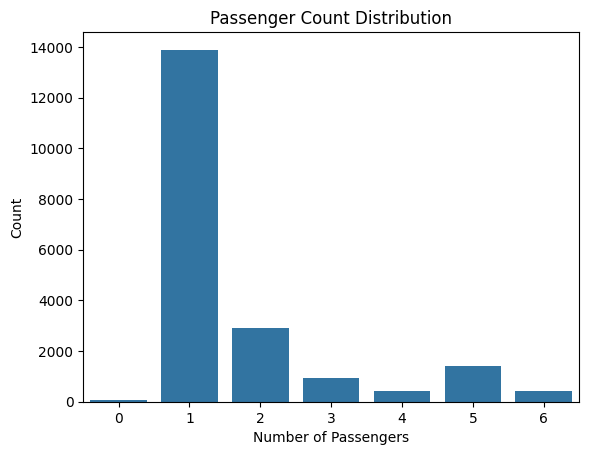

In [ ]:
# Passenger Count Distribution
sns.countplot(x='number_of_passengers', data=df)
plt.title('Passenger Count Distribution')
plt.xlabel('Number of Passengers')
plt.ylabel('Count')
plt.show()

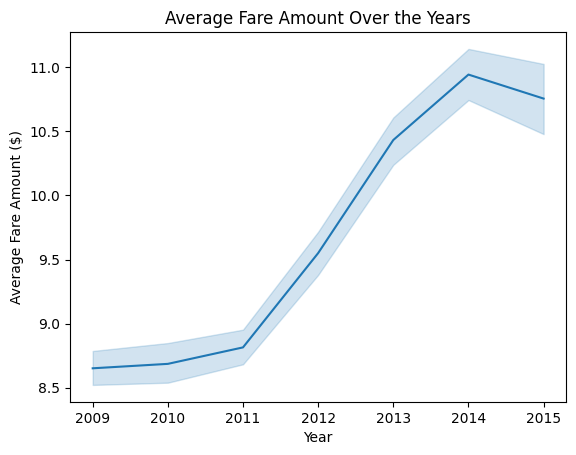

In [ ]:
# Average Fare Amount by Year
sns.lineplot(x='year', y='fare_amount', data=df, estimator=np.mean)
plt.title('Average Fare Amount Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Fare Amount ($)')
plt.show()

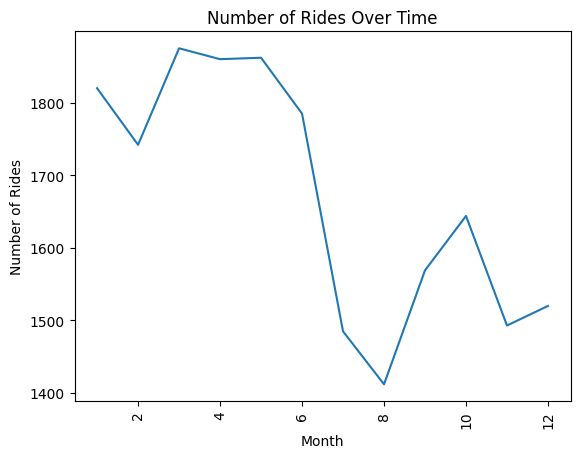

In [ ]:
ride_counts_over_time = df.groupby('month')['fare_amount'].count().reset_index()
sns.lineplot(x='month', y='fare_amount', data=ride_counts_over_time)
plt.title('Number of Rides Over Time')
plt.xlabel('Month')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.ylabel('Number of Rides')
plt.show()